In [1]:
# Importing Libraries  
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go  
from plotly.subplots import make_subplots
import plotly.offline as py 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

py.init_notebook_mode(connected = True)

sns.set_style('darkgrid')
plt.style.use('dark_background')

<h1 id = "CD"> 
<div style = "padding:20px;color:#ffffff;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#16953B;overflow:hidden;font-weight:800"> 
    Cleaning Data
</div>
</h1> 

In [2]:
# Reading Data  
df = pd.read_csv('/kaggle/input/crop-yield-prediction-dataset/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
# Drop irrelevant column  
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
Removing the 'Unnamed: 0' column. 
</div>

In [4]:
# Rename misleading column names  
df.rename(columns = {'Area' : 'Country'}, inplace = True)

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
Renaming the 'Area' column to 'Country' for clarity purposes.  
</div>

<h1 id = "EDA"> 
<div style = "padding:20px;color:#ffffff;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#16953B;overflow:hidden;font-weight:800"> 
    Exploratory Data Analysis
</div>
</h1> 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
df['Item'].value_counts() 

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [8]:
df.describe(include = 'object')

,Country,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
India is the most frequent country in the dataset while potatoes are the most frequent crop.   
</div>

In [ ]:
# Check for the countries with the highest overall crop yield  
df.groupby(['Country'], sort = True)[['hg/ha_yield']].sum().nlargest(10, 'hg/ha_yield')

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
India by far yields the most crops. The combination of Brazil and Mexico would still not be as much as India's crop yield. 
</div>

In [9]:
# Check which specific crop yield is the highest respective to their country  
df.groupby(['Item','Country'], sort = True)['hg/ha_yield'].sum().nlargest(10)

Item            Country       
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
The highest individual crop yield is Cassava from India. The highest individual crop yields are potatoes or sweet potatoes otherwise.   
</div>

In [ ]:
sns.pairplot(data = df, hue = 'Item', kind = 'scatter', palette = 'mako')

In [ ]:
df.hist(figsize = (15, 15));

<div class = "alert alert-block alert-success"> 
        <li> Most rainfall is between 0 - 2000 mm. </li>
        <li> Most average temperatures around around 25 degrees celsius. </li>
        <li> Most crop yield is between 0 - 100000 hg / ha. </li>  
        <li> Most pesticide use is between 0 - 50000 tons. </li>
</div>

In [ ]:
hm = df.copy()

cat_col = hm.select_dtypes(include = ['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in cat_col :
    hm[col] = label_encoder.fit_transform(hm[col])

# Confusion Matrix 
cm = sns.heatmap(hm.corr(), annot = True, cmap = 'mako')
plt.show()

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
The strongest correlation is between country and pesticides_tonnes. The most likely explanation is that countries can have regulations on pesticides and countries use pesticides based on the prevalence of local pests.  
</div>

In [10]:
# Map of countries in the dataset  
geojson_url = 'https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson'
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on = 'NAME', right_on = 'Country', how = 'left')

merged_data.plot(column = 'hg/ha_yield', cmap = 'Greens_r', linewidth = 0.8, edgecolor = '0.8')
plt.title('Countries')
plt.show()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
Some notable countries not found in the dataset are the US, China, and Russia. These three countries are among the top producing countries of agricultural commodities.  
</div>

In [ ]:
# Delete geojson data  
del merged_data
del data

<a id = "basic" ></a>
# <b><span style = 'color: #24D540'> Does Pesticide Use Affect Crop Yield? </span> </b>

In [ ]:
px.scatter(df, x = 'hg/ha_yield', y = 'pesticides_tonnes', color = 'Country', template = 'plotly_dark') 

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
Pesticide use barely affects crop yield. The r value is 0.064 and the plot above displays this extremely weak correlation. For example, Brazil (the orange dots at the top of the plot), has a higher crop yield still being produced with roughly the same amount of pesticides.   
</div>

In [ ]:
# Method to display 4 interactive plots together vertically 
def four_subplots(plot1, plot2, plot3, plot4, w, h) : 
    figures = [plot1, plot2, plot3, plot4]
    fig = make_subplots(rows = len(figures), cols = 1, vertical_spacing = 0.05)
    
    for i, figure in enumerate(figures) :
        for trace in range(len(figure['data'])) :
            fig.append_trace(figure['data'][trace], row = i + 1, col = 1)
    
    fig.update_layout(width = w, height = h, template = 'plotly_dark')
            
    return fig  

In [ ]:
fig1 = px.scatter(df, x = 'Item', y = 'hg/ha_yield', color = 'Country', template = 'plotly_dark') 
fig2 = px.scatter(df, x = 'Item', y = 'average_rain_fall_mm_per_year', color = 'Country', template = 'plotly_dark') 
fig3 = px.scatter(df, x = 'Item', y = 'pesticides_tonnes', color = 'Country', template = 'plotly_dark') 
fig4 = px.scatter(df, x = 'Item', y = 'avg_temp', color = 'Country', template = 'plotly_dark') 

fig = four_subplots(fig1, fig2, fig3, fig4, 1075, 2500)

# Changing axes labels   
fig.update_xaxes(title_text = 'Item', row = 1, col = 1)
fig.update_xaxes(title_text = 'Item', row = 2, col = 1)
fig.update_xaxes(title_text = 'Item', row = 3, col = 1)
fig.update_xaxes(title_text = 'Item', row = 4, col = 1)

fig.update_yaxes(title_text = 'hg/ha_yield', row = 1, col = 1)
fig.update_yaxes(title_text = 'average_rain_fall_mm_per_year', row = 2, col = 1)
fig.update_yaxes(title_text = 'pesticides_tonnes', row = 3, col = 1)
fig.update_yaxes(title_text = 'avg_temp', row = 4, col = 1)

fig.update_layout(showlegend = False) 

<div class = "alert alert-block alert-success"> 
        <li> The top-producing crops are potatoes, cassava, and sweet potatoes. </li>
        <li> Average amount of rainfall is more correlated towards country than crops. </li>
        <li> Brazil uses the most pesticides by far out of any country. </li>  
        <li> Cassava, sweet potatoes, yams, and plantains & others grow in warmer climates while the rest of the crops grow in varying climates. </li>
</div>

In [ ]:
grouped = df.groupby('Item')

top_areas = []

# Create dataframe for the top individual crop yields  
for item, group in grouped :
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]
    
    area = max_production_row['Country'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]
    
    top_areas.append({'Item' : item, 'Country' : area, 'hg/ha_yield' : production})

top_areas_df = pd.DataFrame(top_areas)

top_areas_df

In [ ]:
px.bar(top_areas_df, x = 'hg/ha_yield', y = 'Country', color = 'Item', template = 'plotly_dark')  

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
Each top producer of a specific crop is a different country.   
</div>

In [ ]:
fig1 = px.scatter(df, x = 'pesticides_tonnes', y = 'hg/ha_yield', 
                  labels = {'pesticides_tonnes' : 'Pesticide Tons', 'hg/ha_yield' : 'Average Yield'}, 
                  color = 'Item', template = 'plotly_dark') 
fig2 = px.scatter(df, x = 'average_rain_fall_mm_per_year', y = 'hg/ha_yield', 
                  labels = {'average_rain_fall_mm_per_year' : 'Average Rainfall (mm) Per Year', 'hg/ha_yield' : 'Average Yield'}, 
                  color = 'Item', template = 'plotly_dark') 
fig3 = px.scatter(df, x = 'avg_temp', y = 'hg/ha_yield', 
                  labels = {'avg_temp' : 'Average Temperature', 'hg/ha_yield' : 'Average Yield'}, 
                  color = 'Item', template = 'plotly_dark') 
fig4 = sns.lineplot(x = 'Year', y = 'hg/ha_yield', hue = 'Item', data = df, legend = True, palette = 'Spectral')

fig1.show()
fig2.show()
fig3.show()

fig4.set(ylabel = 'Average Yield')
fig4.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.gcf().set_size_inches(11, 7) 
plt.style.use("dark_background") 
plt.show()

<div class = "alert alert-block alert-success"> 
        <li> Crop yield slightly decreases as pesticide usage increases. </li>
        <li> Crop yield slightly decreases as average rainfall increases after 2000 mm. </li>
        <li> Crop yield slightly decreases as the average temperature decreases before 5 Celsius. </li>  
        <li> Crop yield has gradually increased over time. </li>
</div>

In [ ]:
fig1 = px.line(df.groupby(['Year'])['hg/ha_yield'].mean(), 
               labels = {'value' : 'hg/ha_yield'}, template = 'plotly_dark') 
fig2 = px.line(df.groupby(['Year'])['average_rain_fall_mm_per_year'].mean(), 
               labels = {'value' : 'average_rain_fall_mm_per_year'}, template = 'plotly_dark') 
fig3 = px.line(df.groupby(['Year'])['pesticides_tonnes'].mean(), 
               labels = {'value' : 'pesticides_tonnes'}, template = 'plotly_dark') 
fig4 = px.line(df.groupby(['Year'])['avg_temp'].mean(), 
               labels = {'value' : 'avg_temp'}, template = 'plotly_dark') 

fig1.show()
fig2.show()
fig3.show()
fig4.show()

<div class = "alert alert-block alert-success"> 
        <li> Crop yield has gradually increased over time. </li>
        <li> Average rainfall dropped significantly between 1990 - 1993 and has remained stable since then. </li>
        <li> Pesticide use has gradually increased over time. </li>
        <li> The average temperature has slightly increased over time. </li>  
</div>

<h1 id = "DV"> 
<div style = "padding:20px;color:#ffffff;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#16953B;overflow:hidden;font-weight:800"> 
    Preprocessing Data
</div>
</h1> 

In [11]:
x, y = df.drop(labels = 'hg/ha_yield', axis = 1), df['hg/ha_yield']
# Convert data into dummy variables 
x = pd.get_dummies(x)

In [12]:
# Split the data into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

<h1 id = "ML Models"> 
<div style = "padding:20px;color:#ffffff;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#16953B;overflow:hidden;font-weight:800"> 
    Machine Learning Models
</div>
</h1> 

In [13]:
results = []

# List of machine learning models that will be trained  
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state = 1)),
    ('Random Forest', RandomForestRegressor(random_state = 1)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 1)),
    ('XGBoost', XGBRegressor(random_state = 1)),
    ('Bagging Regressor', BaggingRegressor(n_estimators = 100, random_state = 1)),  
    ('KNN', KNeighborsRegressor(n_neighbors = 10))]

Accuracy of Linear Regression Model Train is 75.73
Accuracy of the Linear Regression Model Test is 75.14


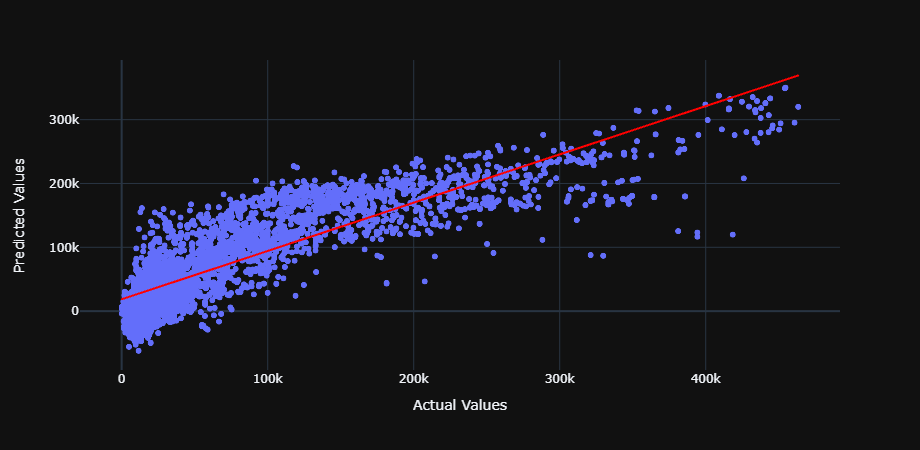

Accuracy of Decision Tree Model Train is 100.00
Accuracy of the Decision Tree Model Test is 97.82


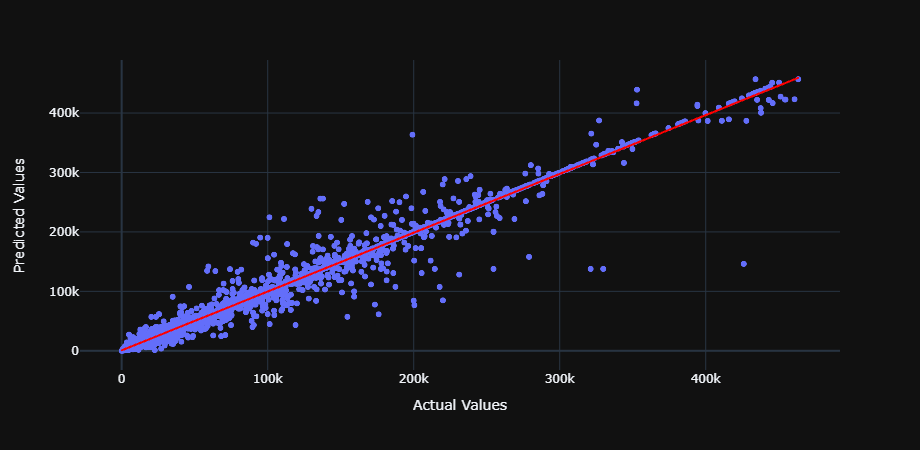

Accuracy of Random Forest Model Train is 99.84
Accuracy of the Random Forest Model Test is 98.48


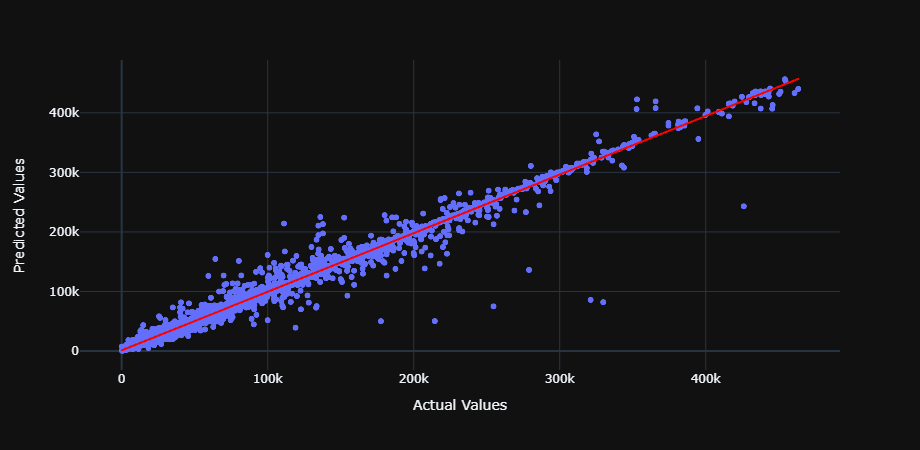

Accuracy of Gradient Boost Model Train is 87.53
Accuracy of the Gradient Boost Model Test is 86.51


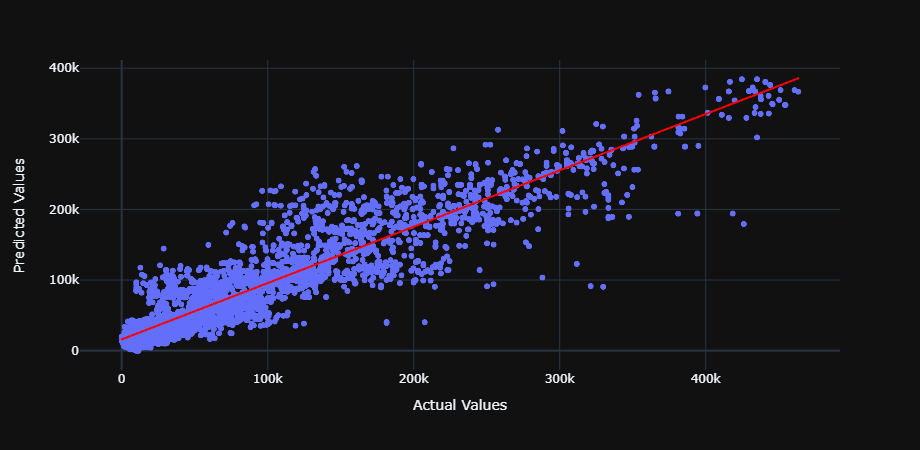

Accuracy of XGBoost Model Train is 98.37
Accuracy of the XGBoost Model Test is 97.35


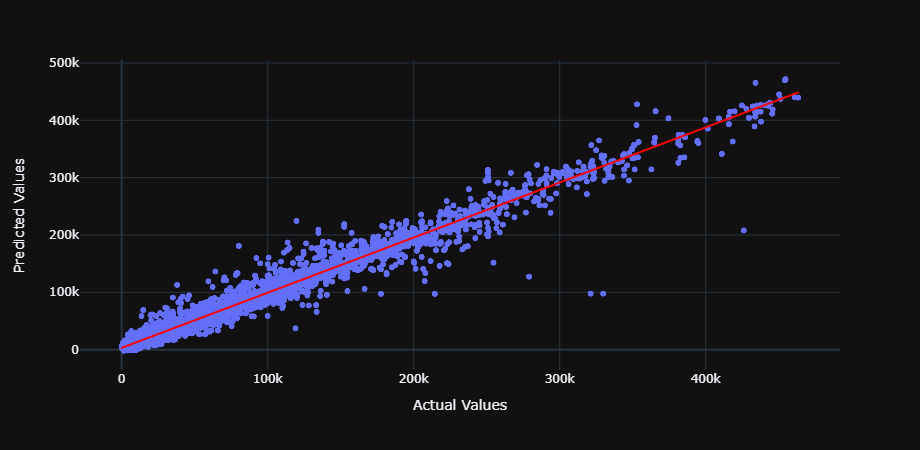

In [ ]:
# Loops through the list of machine learning models above  
for name, model in models :
    # Train Model  
    model.fit(x_train, y_train)  
    # Make Predictions   
    y_pred = model.predict(x_test)                      
    
    accuracy = model.score(x_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    # Add all metrics of model to a list    
    results.append((name, accuracy, MSE, R2_score))     
    
    acc = (model.score(x_train , y_train) * 100)
    print(f'Accuracy of {name} Model Train is {acc:.2f}')
    acc = (model.score(x_test , y_test) * 100)
    print(f'Accuracy of the {name} Model Test is {acc:.2f}')  
    
    data = {'y_test' : [y_test], 
            'y_pred' : [y_pred]} 
    data_df = pd.DataFrame(data)
    
    fig = px.scatter(data_df, x = y_test, y = y_pred, 
                     labels = {'x' : 'Actual Values', 'y' : 'Predicted Values'},  
                     trendline = 'ols', trendline_color_override = 'red', 
                     template = 'plotly_dark')
    fig.show()

<a id = "basic" ></a>
# <b><span style = 'color: #24D540'> Comparing Models </span> </b>

In [ ]:
# Dataframe consisting of metrics of all the models   
results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'MSE', 'R2_score'])
# Add red and green highlights in the dataframe to display best and worst performing models  
results_format_df = results_df.style.highlight_max(subset = ['Accuracy', 'R2_score'], color = 'green').highlight_min(subset = ['MSE'], color = 'green').highlight_max(subset = ['MSE'], color = 'red').highlight_min(subset = ['Accuracy','R2_score'], color = 'red')
display(results_format_df)

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
The Random Forest model was the most accurate with the Bagging Regressor, Decision Tree, and XGBoost models extremely close behind. Out of the 7 models tested, these four models are by far the best models to utilize for predicting crop yield. The KNN model was by far the worst. The Linear Regression and Gradient Boost models had somewhat high accuracy, but not nearly as high as the aforementioned four models. 
</div>

<h1 id = "KF"> 
<div style = "padding:20px;color:#ffffff;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;background-color:#16953B;overflow:hidden;font-weight:800"> 
    K-Fold Cross Validation
</div>
</h1> 

In [ ]:
results = [] 
fold_df = pd.DataFrame()

# Loops through the list of machine learning models   
for name, model in models :
    # Train Model   
    model.fit(x_train, y_train)
    # Make Predictions     
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    # Add all metrics of model to a list      
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))
    
    print(name)
    kf = KFold(n_splits = 10, shuffle = True)
    scores = cross_val_score(model, x, y, cv = kf)
    
    # Print out the CV Scores for each fold  
    for fold, score in enumerate(scores) :
        print(f'Fold {fold + 1}: {score}')
        temp_df = pd.DataFrame({'Name' : name, 'Fold' : [fold + 1], 'Score' : [score]}) 
        dfs = [fold_df, temp_df] 
        fold_df = pd.concat(dfs, ignore_index = True)

    # Print out the Mean CV scores for each model     
    mean_score = np.mean(scores)
    print(f'Mean Score: {mean_score}')
    print('=' * 30)

In [ ]:
for i in range(1, 8) : 
    plot_fold_df = fold_df.iloc[i * 10 - 10 : i * 10] 
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = plot_fold_df['Fold'],
                             y = plot_fold_df['Score'],
                             mode = 'lines+markers',
                             name = 'Accuracy'))

    fig.update_layout(title = {'text' : plot_fold_df['Name'].iloc[i],
                       'xanchor' : 'center',
                       'yanchor' : 'top',
                       'x' : 0.5},
                       xaxis_title = 'Fold',
                       yaxis_title = 'Score',
                       title_font = dict(size = 20))
 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
All of the models except for the Linear Regression and Random Forest models have the highest CV score within the 1 - 5 folds.   
</div>

<a id = "basic" ></a>
# <b><span style = 'color: #24D540'> Comparing Models </span> </b>

In [ ]:
# Dataframe consisting of metrics of all the models     
result_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
# Add red and green highlights in the dataframe to display best and worst performing models  
result_format_df = result_df.style.highlight_max(subset = ['Accuracy','R2_score'], color = 'green').highlight_min(subset = ['MSE','MAE','MAPE'], color = 'green').highlight_max(subset = ['MSE','MAE','MAPE'], color = 'red').highlight_min(subset = ['Accuracy','R2_score'], color = 'red')
display(result_format_df)

<div style="color:white; display:fill; border-radius:5px; background-color:#1A9784; font-size:90%; font-family:Verdana; letter-spacing:0.5px">
<p style="padding:10px; color:white; margin-bottom:0;">
Utilizing K-Fold cross-validation, the Random Forest model still remains the best model. The KNN still remains the worst model. There is no significant change in any of the models' accuracy when using K-Fold cross-validation.  
</div>